# Creating cell complex and accessing k-cells

In [54]:
import matplotlib.pyplot as plt
import numpy as np

from matgen.base import CellComplex
from matgen.entropic import TripleJunctionSet
from matgen import matutils

In [5]:
# Load cell complex from a `.tess` file
filename = 'n10-id1/n10-id1.tess'
cell_complex = CellComplex.from_tess_file(filename, with_cell_size=True)
print(cell_complex)

<class CellComplex> 3D
54 vertices
104 edges
61 faces
10 polyhedra


In [9]:
# Cell complex dimension
cell_complex.dim

3

In [12]:
# Number of vertices
cell_complex.vernb

54

In [13]:
# Number of edges
cell_complex.edgenb

104

In [14]:
# Number of faces
cell_complex.facenb

61

In [15]:
# Number of polyhedra
cell_complex.polynb

10

In [19]:
# Number of grains
cell_complex.grainnb

10

In [17]:
# Crystal symmetry
cell_complex.crysym

'triclinic'

In [18]:
# Load time in s
cell_complex.load_time

0.0

In [16]:
# get all k-cells

# cell_complex.vertices
# cell_complex.edges
# cell_complex.faces
# cell_complex.polyhedra

In [6]:
# get one or many k-cells
# >>> cell_complex.get_one(cell_type, cell_id)
# >>> cell_complex.get_many(cell_type, cell_ids)

v3 = cell_complex.get_one('v', 3) # 'vertex', 'v', 0
print(v3)
e2 = cell_complex.get_one('e', 2) # 'edge', 'e', 1
print(e2)
f5 = cell_complex.get_one('f', 5) # 'face', 'f', 2
print(f5)
p8 = cell_complex.get_one('p', 8) # 'poly', 'p', 3
print(p8)

Vertex3D(id=3, x=-0.000, y=-0.000, z=0.041)
Edge3D(id=2)
Face3D(id=5)
Poly(id=8)


In [20]:
# all cells "know" their own id, neighbours ids
print(f'Cell id: {v3.id},', 'neigbour ids:', v3.n_ids)

# all cells of lower order "know" their incident cells ids
# there are two options: with or without cell orientations 
print(f'Cell id: {e2.id},', 'signed incident ids:', e2.signed_incident_ids)
print(f'Cell id: {e2.id},', 'unsigned incident ids:', e2.incident_ids)

Cell id: 3, neigbour ids: [4, 1, 5, 13]
Cell id: 2, signed incident ids: [1, -6, -9]
Cell id: 2, unsigned incident ids: [1, 6, 9]


In [ ]:
# cells of higher order "know" their vertices, edges and faces ids

# f5.v_ids
# f5.e_ids

# p8.v_ids
# p8.e_ids
# p8.f_ids

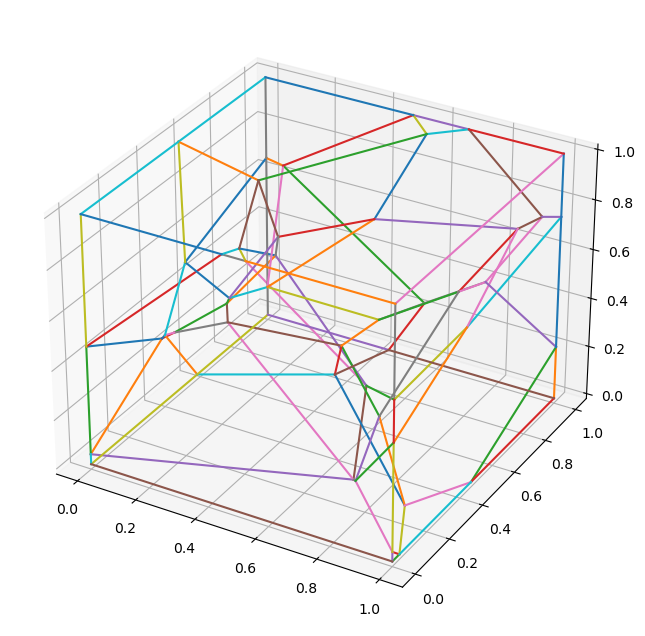

In [22]:
# cells can be plot
cell_complex.plot_edges()
plt.show()

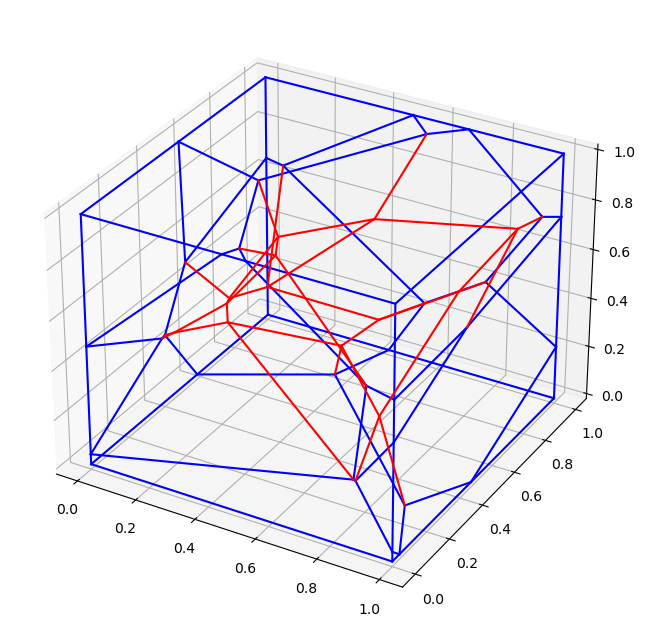

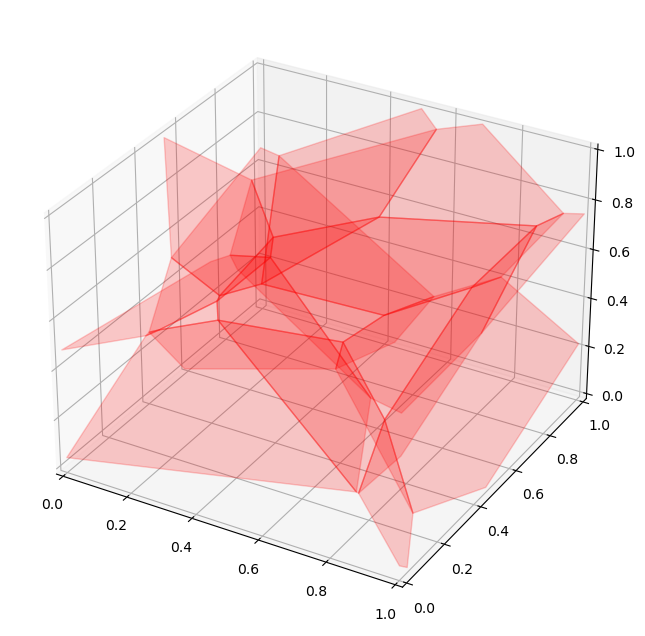

In [24]:
# cells can be external or internal
ext_e_ids = cell_complex.get_external_ids('e')
int_e_ids = cell_complex.get_internal_ids('e')

ax = cell_complex.plot_edges(ext_e_ids, color='blue')
ax = cell_complex.plot_edges(int_e_ids, color='red', ax=ax)
plt.show()

int_f_ids = cell_complex.get_internal_ids('f')

cell_complex.plot_faces(int_f_ids, color='red')
plt.show()

# Disorientation angles

In [25]:
filename = 'pass1.tess'
cell_complex_pass1 = CellComplex.from_tess_file(filename)
print(cell_complex_pass1)

<class CellComplex> 2D
1986 vertices
2977 edges
992 faces


In [27]:
# grains have crysym, oridesc and ori attributes

f2 = cell_complex_pass1.get_one('f', 2)
print(f2)
print(f2.crysym)
print(f2.oridesc)
print(f2.ori)

Face2D(id=2)
cubic
rodrigues:active
(-0.179201613134, 0.109842855823, -0.1091027585)


In [28]:
# grain boundaries can have disorientation angle (theta) between corresponding incident grains
e42 = cell_complex_pass1.get_one('e', 42)

print(e42.incident_ids)
print(e42.theta)

[9, 14]
None


In [29]:
# theta may be loaded or calculated from grain crystal orientations 

# cell_complex = CellComplex.from_tess_file(filename, with_theta=True)
# cell_complex.set_thetas(thetas_list)
# cell_complex.set_theta_form_file(thetas_filename)

# May take some time to finish

cell_complex_pass1.set_theta_from_ori()

In [30]:
print(e42.theta) # theta in degrees

9.575331757255741


In [31]:
# calculate disorientation angle between any two grains

f9 = cell_complex_pass1.get_one('f', 9)
f14 = cell_complex_pass1.get_one('f', 14)

f9.dis_angle(f14)

9.575331757255741

In [32]:
# neighbors of orders higher than 1 can be calculated
# cell_complex_pass1.find_neighbors_of_order(max_order)
cell_complex_pass1.find_neighbors_of_order(8)

# they can be accessed via n{k}_ids attribute
print('Own id:', f9.n0_ids) # list with own id
print('Neighbors:', f9.n1_ids) # neighbors
print('Neighbors of neighbors:', f9.n2_ids) # again neighbors
print('Neighbors of 8 order:', f9.n8_ids) # again neighbors

Own id: [9]
Neighbors: [14, 15]
Neighbors of neighbors: [17, 23]
Neighbors of 8 order: [258, 142, 289, 34, 417, 38, 40, 424, 301, 174, 188, 191, 192, 195, 202, 85, 88, 91, 372]


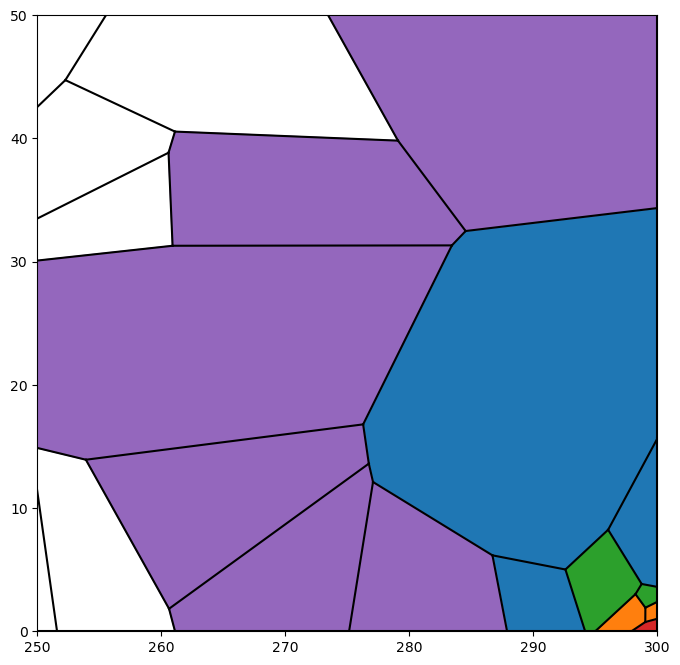

In [49]:
ax = cell_complex_pass1.plot_faces(f9.n0_ids, color='C3')
cell_complex_pass1.plot_faces(f9.n1_ids, color='C1', ax=ax)
cell_complex_pass1.plot_faces(f9.n2_ids, color='C2', ax=ax)
cell_complex_pass1.plot_faces(f9.n3_ids, color='C0', ax=ax)
cell_complex_pass1.plot_faces(f9.n4_ids, color='C4', ax=ax)
cell_complex_pass1.plot_edges(color='black', ax=ax)
ax.set_xlim([250, 300])
ax.set_ylim([0, 50])
plt.show()

In [50]:
# All disorientation angles between grains and their neighbors of any order can be calculated
# >>> cell_complex_pass1.get_neighbor_dis_angles(order)
disangles1 = cell_complex_pass1.get_neighbor_dis_angles(1)

100%|█████████████████████████| 992/992 [00:07<00:00, 131.18it/s]


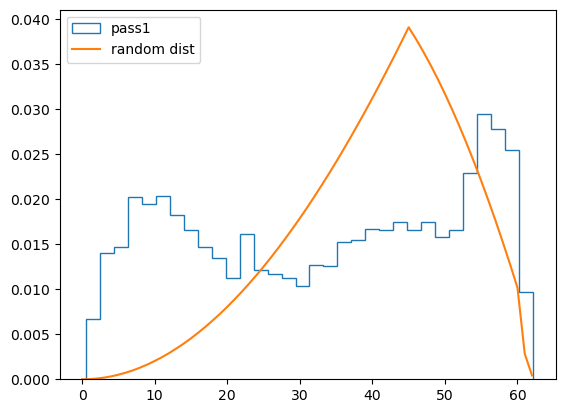

In [55]:
plt.hist(disangles1, bins=32, density=True, histtype='step', label='pass1')

x = np.arange(63)
y = matutils.mackenzie(x)
plt.plot(x, y, label='random dist')
plt.legend()
plt.show()

# Cell complex characteristics

In [56]:

print(cell_complex_pass1.get_special_ids())

# Internal grain boundaries may be set special by choosing lower threshold or upper threshold or both

# cell_complex = CellComplex.from_tess_file(filename, with_theta=True, theta_file, lower_thrd, upper_thrd)
# or
# cell_complex.set_thetas(thetas_list, lower_thrd, upper_thrd)
# or
# cell_complex.set_theta_form_file(thetas_filename, lower_thrd, upper_thrd)

# If needed, after setting theta triple junction types must be calculated
# cell_complex.set_junction_types()

[]


In [58]:
# Special GBs may be reset

cell_complex_pass1.reset_special(0, 15)
print(len(cell_complex_pass1.get_special_ids()))
print('p =', cell_complex_pass1.p) # Be careful with external/internal Neper issues

673
p = 0.23547935619314206


In [59]:
# when special GBs set, triple junction types may be retrieved
# junction_type may be 0, 1, 2, 3
tj0_ids = cell_complex_pass1.get_junction_ids_of_type(0)
tj1_ids = cell_complex_pass1.get_junction_ids_of_type(1)
tj2_ids = cell_complex_pass1.get_junction_ids_of_type(2)
tj3_ids = cell_complex_pass1.get_junction_ids_of_type(3)
print('TJ3 =', cell_complex_pass1.get_j_fraction(3))

TJ3 = 0.0712372790573112


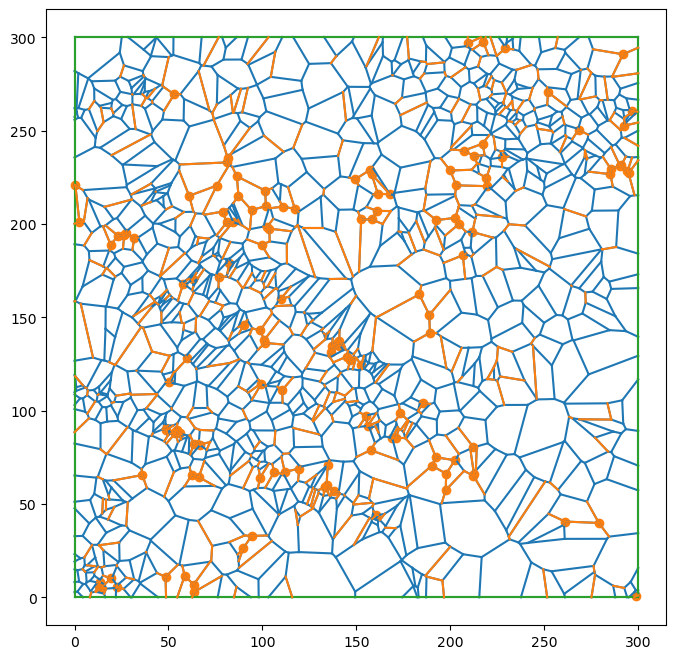

In [60]:
ax = cell_complex_pass1.plot_edges(color='C0')
cell_complex_pass1.plot_edges(cell_complex_pass1.get_external_ids('e'), color='C2', ax=ax)
cell_complex_pass1.plot_edges(cell_complex_pass1.get_special_ids(), color='C1', ax=ax)
cell_complex_pass1.plot_vertices(tj3_ids, color='C1', ax=ax)
plt.show()

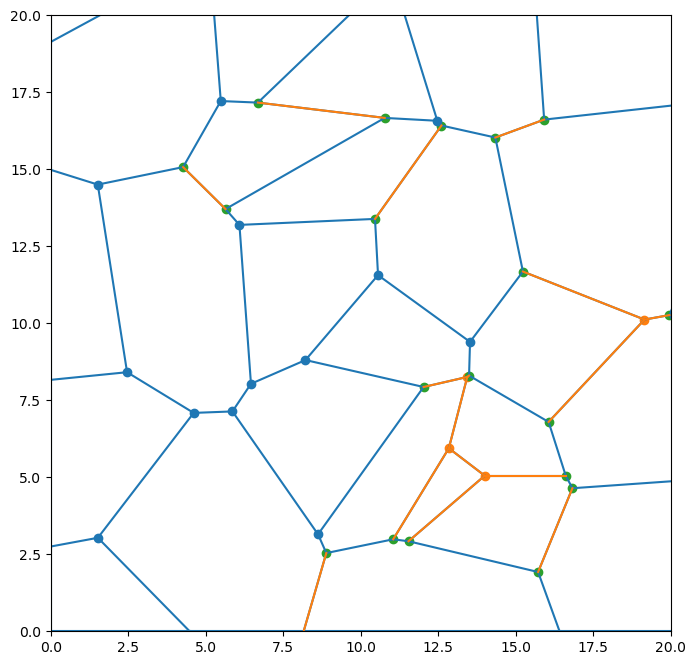

In [61]:
ax = cell_complex_pass1.plot_edges(color='C0')
cell_complex_pass1.plot_edges(cell_complex_pass1.get_special_ids(), color='C1', ax=ax)
cell_complex_pass1.plot_vertices(tj3_ids, color='C1', ax=ax)
cell_complex_pass1.plot_vertices(tj1_ids, color='C2', ax=ax)
cell_complex_pass1.plot_vertices(tj0_ids, color='C0', ax=ax)
cell_complex_pass1.plot_vertices(tj2_ids, color='C3', ax=ax)
plt.xlim((0, 20))
plt.ylim((0, 20))
plt.show()

In [62]:
cell_complex_pass1.j_tuple

(0.4724156400642742,
 0.4209962506695233,
 0.03535083020889127,
 0.0712372790573112)

In [63]:
cell_complex_pass1.describe()

{'p': 0.23547935619314206,
 'j0': 0.4724156400642742,
 'j1': 0.4209962506695233,
 'j2': 0.03535083020889127,
 'j3': 0.0712372790573112,
 'q': 0.7645206438068579,
 'Sp': 0.7874414356442989,
 'Sp_m': 1.2368500715966775,
 'Sp_s': -0.44940863595237873,
 'p_expected': 0.2351365827530798,
 'delta_p': 0.0003427734400622551,
 'S': 1.4785139710069657,
 'S_m': 2.7408319865572595,
 'S_s': -1.2623180155502935,
 'kappa': -2.171269008913276,
 'delta_S': -0.6910725353626668,
 'd1': 0.7979695431472081,
 'd2': 0.06700507614213198,
 'd3': 0.13502538071065992,
 'sigma': 0.2851969265007198,
 'chi': 0.7273799666526773}

In [64]:
cell_complex_pass1.describe(attr_list=['p', 'Sp', 'S'])

{'p': 0.23547935619314206, 'Sp': 0.7874414356442989, 'S': 1.4785139710069657}

# DDRX

In [4]:
data = pd.read_csv('ddrx_results_copy/results_500_100.txt')

In [17]:
data = pd.read_csv('ddrx_results_copy/results_100_10.txt')

In [20]:
data = pd.read_csv('ddrx_results_copy/results_1000_1.txt')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   new_seeds_number  500 non-null    int64  
 1   new_seeds_frac    500 non-null    float64
 2   omega             500 non-null    float64
 3   j0                500 non-null    float64
 4   j1                500 non-null    float64
 5   j2                500 non-null    float64
 6   j3                500 non-null    float64
 7   HAGBs_frac        500 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 31.4 KB


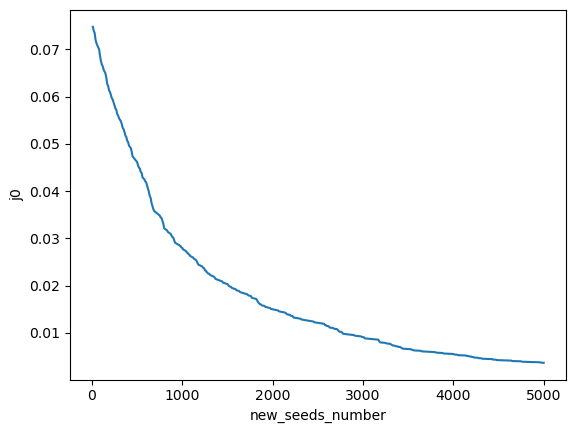

In [25]:
xlabel = 'new_seeds_number'
ylabel = 'j0'
plt.plot(data[xlabel], data[ylabel])
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()

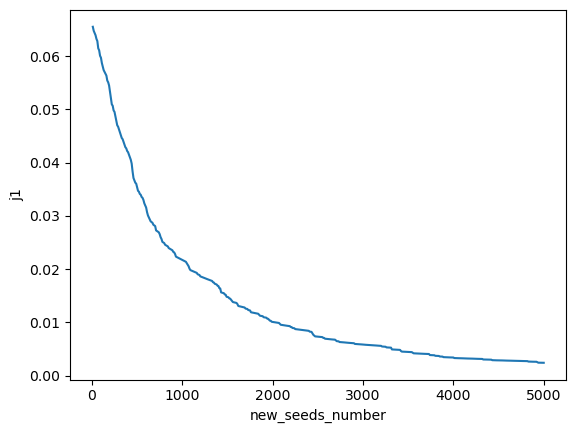

In [26]:
xlabel = 'new_seeds_number'
ylabel = 'j1'
plt.plot(data[xlabel], data[ylabel])
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()

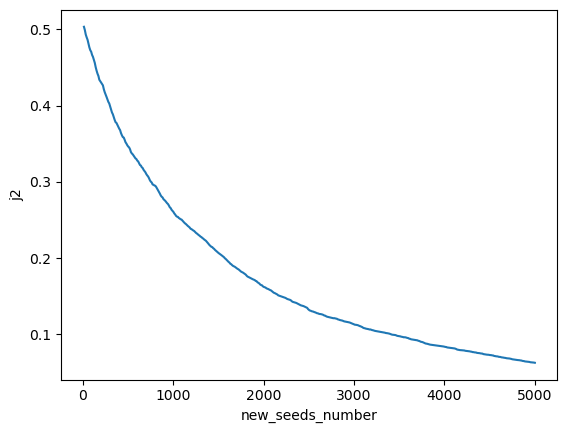

In [27]:
xlabel = 'new_seeds_number'
ylabel = 'j2'
plt.plot(data[xlabel], data[ylabel])
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()

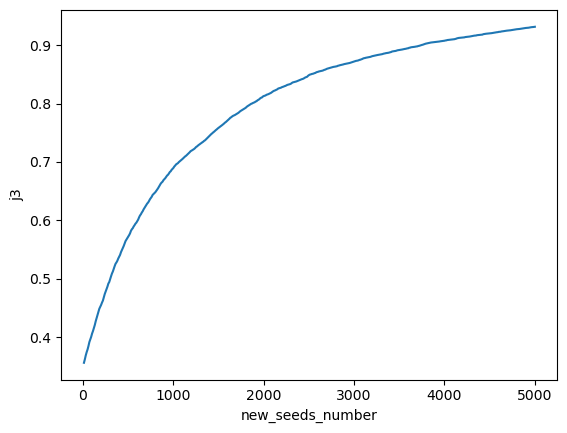

In [28]:
xlabel = 'new_seeds_number'
ylabel = 'j3'
plt.plot(data[xlabel], data[ylabel])
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()

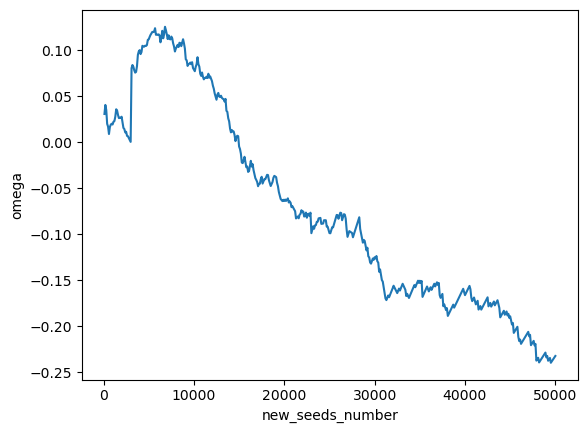

In [5]:
xlabel = 'new_seeds_number'
ylabel = 'omega'
plt.plot(data[xlabel], data[ylabel])
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()

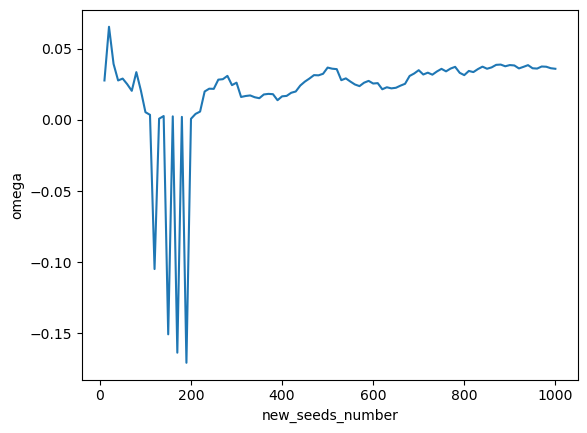

In [18]:
xlabel = 'new_seeds_number'
ylabel = 'omega'
plt.plot(data[xlabel], data[ylabel])
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()

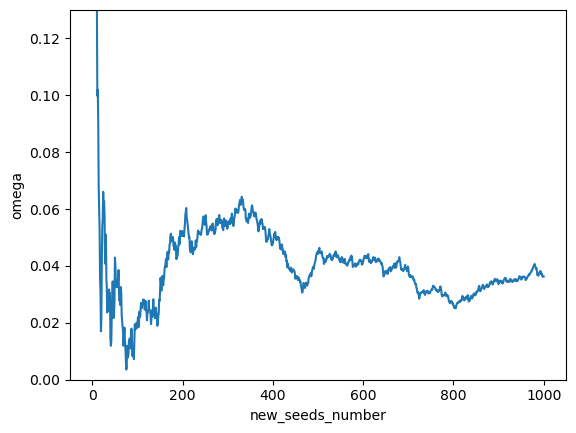

In [23]:
xlabel = 'new_seeds_number'
ylabel = 'omega'
plt.plot(data[xlabel], data[ylabel])
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.ylim([0, 0.13])
plt.show()

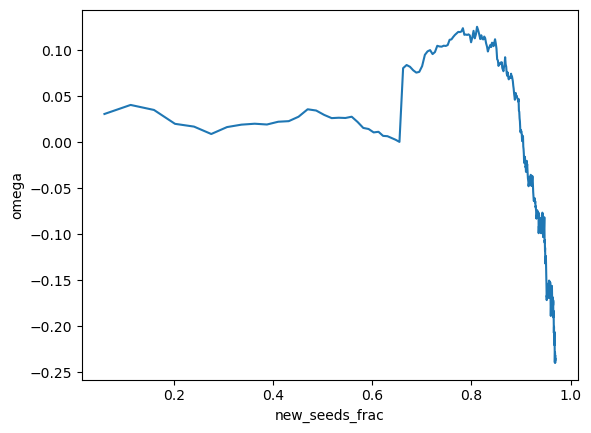

In [6]:
xlabel = 'new_seeds_frac'
ylabel = 'omega'
plt.plot(data[xlabel], data[ylabel])
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()

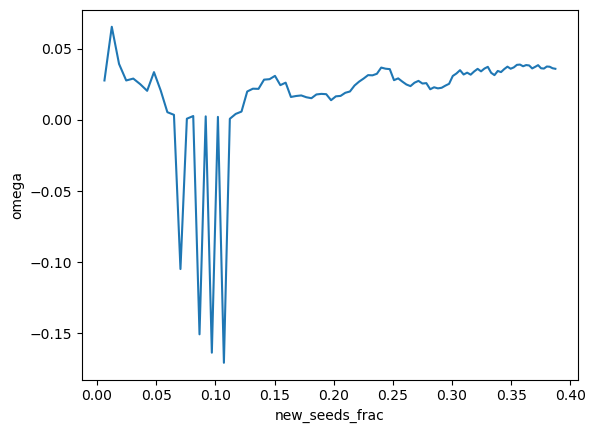

In [19]:
xlabel = 'new_seeds_frac'
ylabel = 'omega'
plt.plot(data[xlabel], data[ylabel])
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()

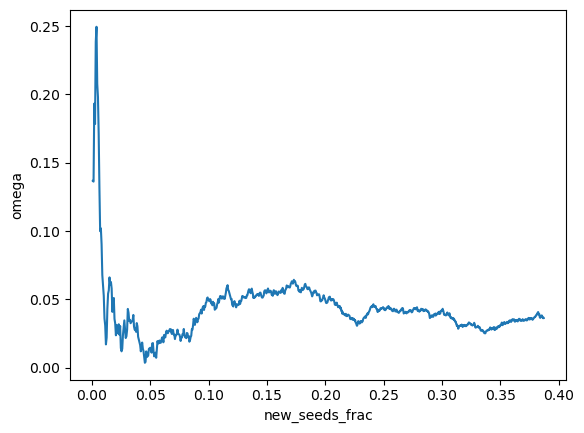

In [22]:
xlabel = 'new_seeds_frac'
ylabel = 'omega'
plt.plot(data[xlabel], data[ylabel])
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()

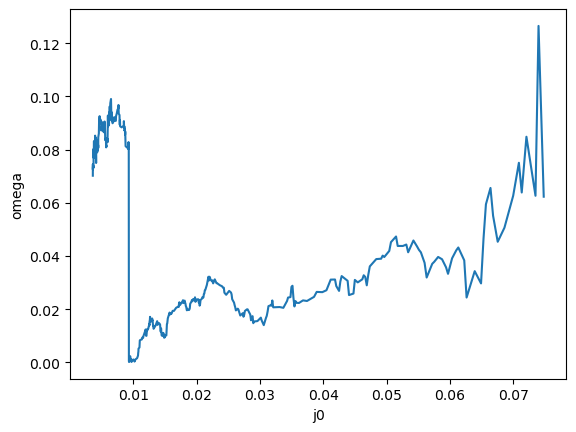

In [11]:
xlabel = 'j0'
ylabel = 'omega'
plt.plot(data[xlabel], data[ylabel])
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()

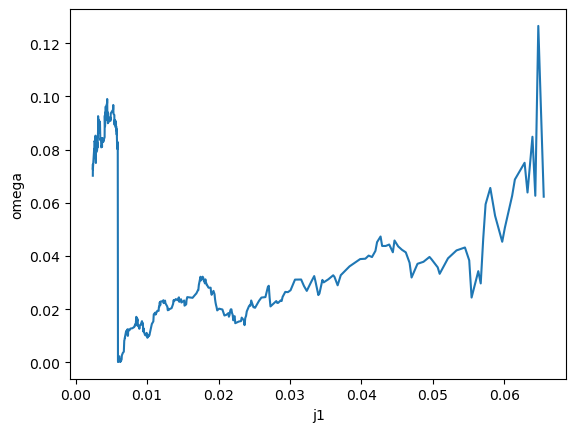

In [12]:
xlabel = 'j1'
ylabel = 'omega'
plt.plot(data[xlabel], data[ylabel])
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()

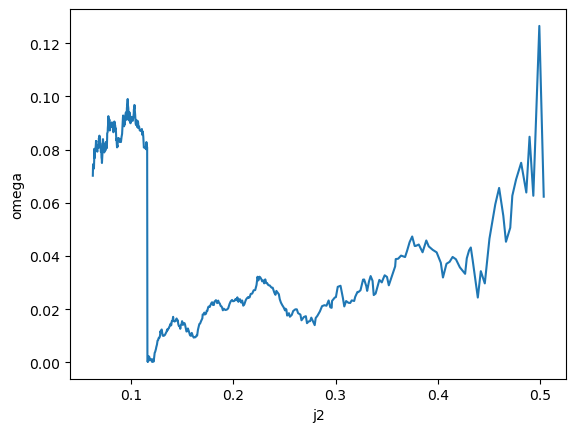

In [13]:
xlabel = 'j2'
ylabel = 'omega'
plt.plot(data[xlabel], data[ylabel])
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()

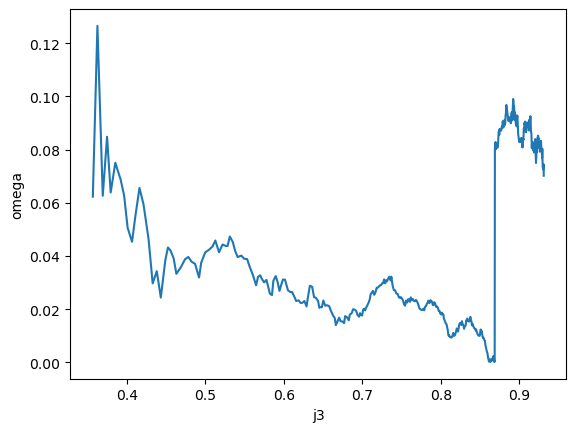

In [14]:
xlabel = 'j3'
ylabel = 'omega'
plt.plot(data[xlabel], data[ylabel])
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()

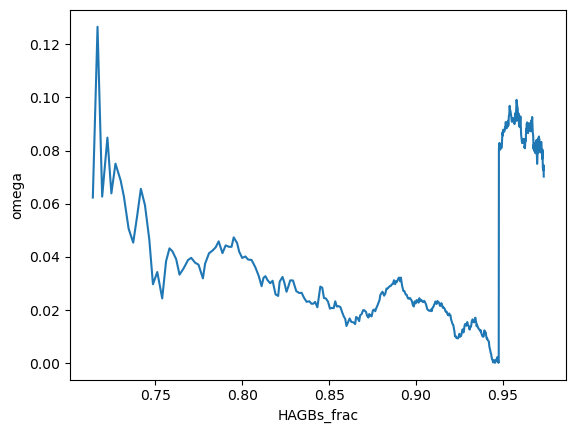

In [15]:
xlabel = 'HAGBs_frac'
ylabel = 'omega'
plt.plot(data[xlabel], data[ylabel])
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()

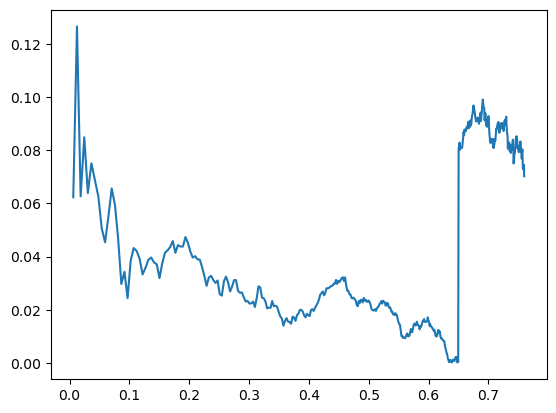

In [8]:
plt.plot(data['new_seeds_frac'], data['omega'])
plt.show()

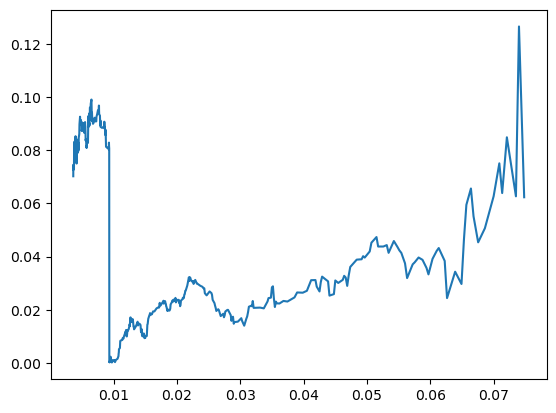

In [9]:
plt.plot(data['j0'], data['omega'])
plt.show()